### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols


# Imports Multilinear Regression
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews_final = reviews.drop(['language', 'platform'],
                       axis=1)

# View column names.
reviews_final

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews_final = reviews_final.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spending_score'})

# View column names.
reviews_final

gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews_final.to_csv('turtle_reviews_clean.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
print(clean_reviews.shape)
print(clean_reviews.info())
clean_reviews.head()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variable.
x = clean_reviews['spending_score'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        23:26:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the coefficient to 33.061693 and the constant to -75.052663.
y_pred = (-75.052663) + 33.061693 * clean_reviews['spending_score'] 

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

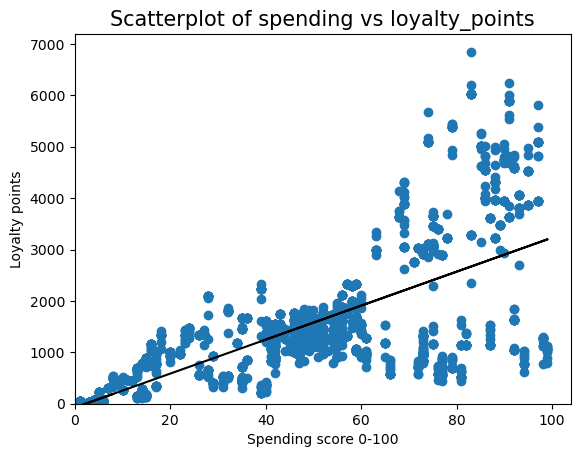

In [13]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title('Scatterplot of spending vs loyalty_points', fontsize = 15)
plt.xlabel('Spending score 0-100')
plt.ylabel('Loyalty points')

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [14]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variable.
x = clean_reviews['renumeration'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        23:26:45   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the coefficient to 34.187825 and the constant to -65.686513.
y_pred = (-65.686513) + 34.187825 * clean_reviews['renumeration'] 

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

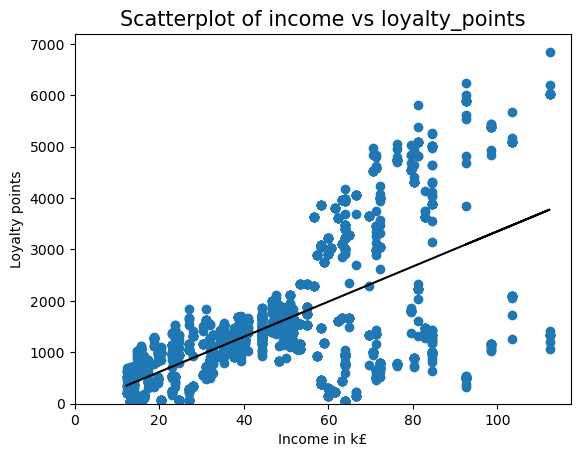

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title('Scatterplot of income vs loyalty_points', fontsize = 15)
plt.xlabel('Income in k£')
plt.ylabel('Loyalty points')


# View the plot.
plt.show()

### 5c) age vs loyalty

In [18]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variable.
x = clean_reviews['age'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 08 Oct 2023   Prob (F-statistic):             0.0577
Time:                        23:26:45   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the coefficient to -4.012805 and the constant to 1736.517739.
y_pred = (1736.517739) - 4.012805 * clean_reviews['age'] 

# View the output.
y_pred


0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

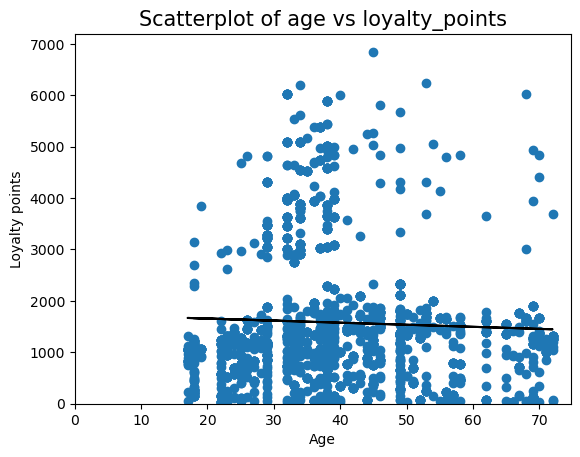

In [21]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title('Scatterplot of age vs loyalty_points', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Loyalty points')

# View the plot.
plt.show()

### 5b) multiple_linear_regression

In [22]:
# Define the dependent variable.
y = clean_reviews['loyalty_points']  

# Define the independent variable.
X = clean_reviews[['spending_score', 'renumeration','age']] 

In [23]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [24]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [25]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8399114912748796
Intercept:  -2203.059751307902
Coefficients:


[('spending_score', 34.18319657763368),
 ('renumeration', 34.00838549260248),
 ('age', 11.06065871184337)]

In [26]:
# Create a variable for independent variables
new_spending_score = 60
new_renumeration = 50
new_age = 20

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[new_spending_score ,new_renumeration,new_age]]))  

Predicted Value: 
 [1769.56449222]


In [27]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [28]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:26:45   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.3411     58.253    -37.

In [29]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [30]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [ 1362.93474067   767.56846704  2292.11541031 ...  1416.57825601
 -1096.31139624  1531.78396384]


In [31]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

85.3050388163067


In [32]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       21.29           const
1        1.06  spending_score
2        1.00    renumeration
3        1.05             age


In [33]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 425.48679627595624
Mean Square Error (Final): 301956.0390785317


## 6. Observations and insights

***Your observations here...***






#### spending vs loyalty:
- The R-squared tells us that the model is explaining 45.2% of the model.
- The coefficient value of 33.0617 tells us that as the spending score increases by 1, the predicted value of loyalty increases by 33.0617.

#### renumeration vs loyalty:
- The R-squared tells us that the model is explaining 38% of the model.
- The coefficient value of 34.1878 tells us that as the renumeration increases by 1, the predicted value of loyalty increases by 34.1878.

#### age vs loyalty:
- The adjusted R-squared tells us that the model is explaining 0.2% of the model.
- The coefficient value of -4.0128 tells us that as the spending score increases by 1, the predicted value of loyalty decreases by -4.0128.

#### multilinear:
- The R-squared tells us that the model is explaining 83.3% of the model. Meaning 83% of the variation in loyalty points can be explained by renumeration, spending score and age
- A user with a spending score of 60, renumeration of 50 and age of 20, is likely to generate 1754 loyalty points
- VIF for spending score and age suggest a strong correlation given the VIF values of 1.06 and 1.05 as compared to the independent variable renumeration with a VIF 1.0
- We can say given the overall low VIF values we can not detect multicollinearity
- The mean absolute error of 425 suggets the variance between our predicated values and actual values (the lower the better). Big errors are punishing us in the mean squared error as suggested by the value of 301956

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [34]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2

gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [36]:
# check for null values again
df2.isnull().sum()

gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [37]:
# Drop unnecessary columns.
df2_renumeration_spending = df2.drop(columns=['gender', 'age', 'loyalty_points','education','product','review','summary'])

# View DataFrame.
df2_renumeration_spending

renumeration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

Text(0, 0.5, 'Count')

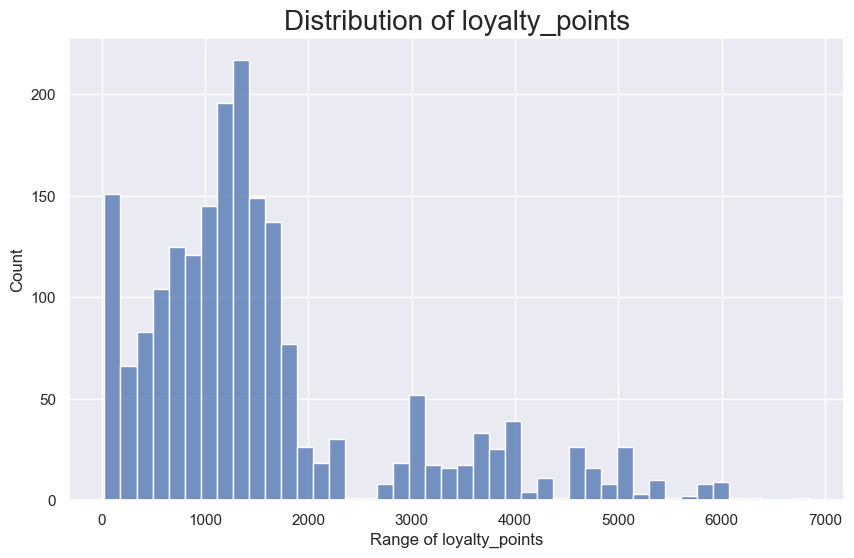

In [38]:
# Explore the data.
#Distribution of loyalty_points
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(df2['loyalty_points'])
plt.title('Distribution of loyalty_points', fontsize = 20)
plt.xlabel('Range of loyalty_points')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

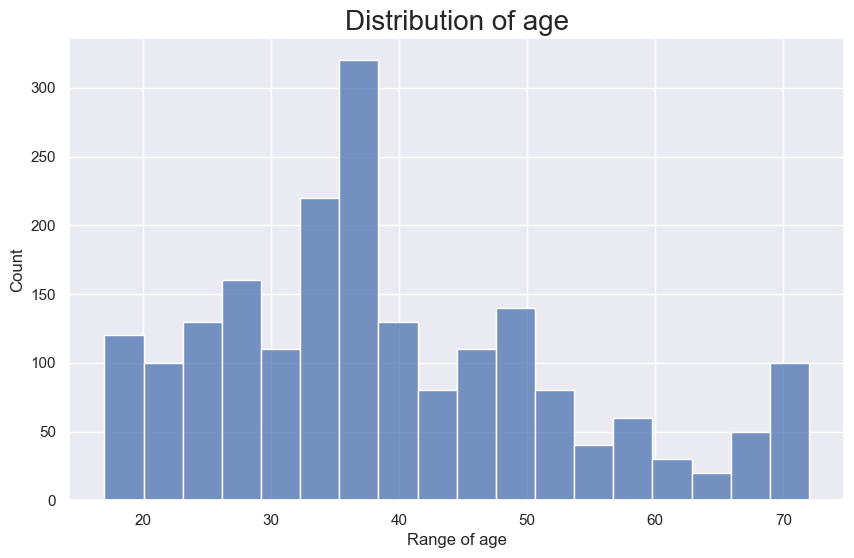

In [39]:
# Explore the data.
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(df2['age'])
plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

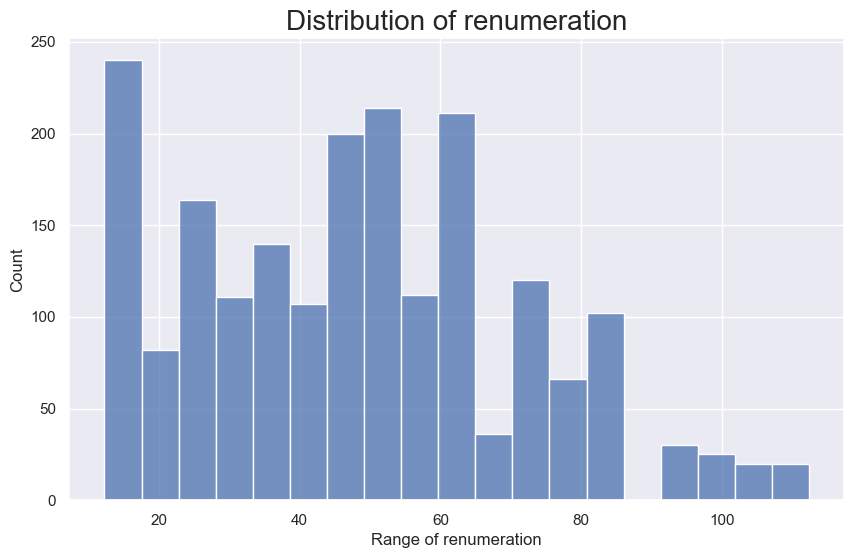

In [40]:
# Explore the data.
#Distribution of renumeration
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(df2_renumeration_spending['renumeration'])
plt.title('Distribution of renumeration', fontsize = 20)
plt.xlabel('Range of renumeration')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

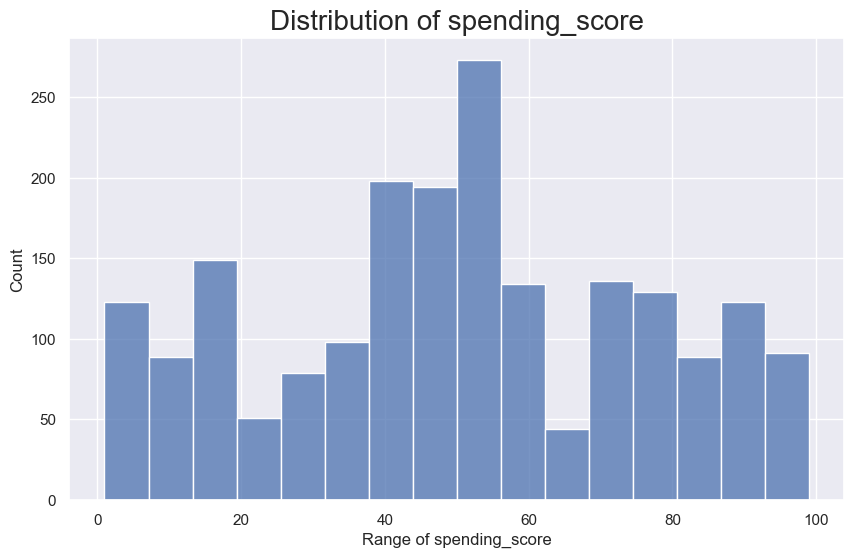

In [41]:
# Explore the data.
#Distribution of spending_score
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(df2_renumeration_spending['spending_score'])
plt.title('Distribution of spending_score', fontsize = 20)
plt.xlabel('Range of spending_score')
plt.ylabel('Count')

In [42]:
# Descriptive statistics.
df2_renumeration_spending.describe()

renumeration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

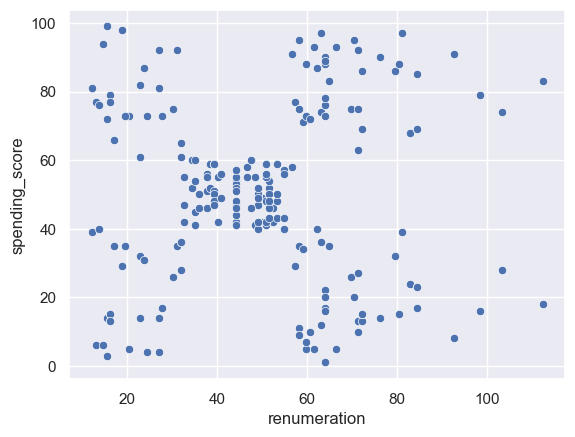

In [43]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2_renumeration_spending)

We can see there is definitely a good possibility of creating clusters using these two features. So let's start creating a clustering model using renumeration and spending score.

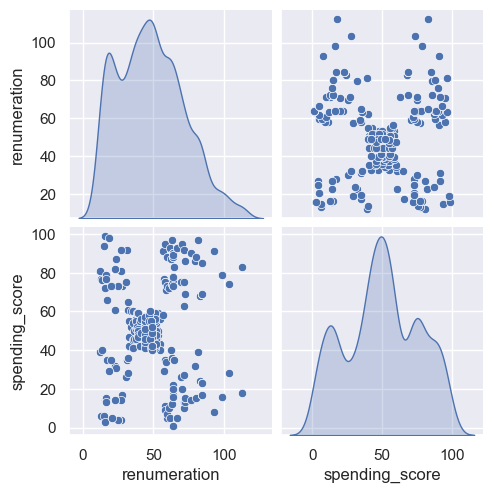

In [44]:
# Create a pairplot with Seaborn.
x = df2_renumeration_spending[['renumeration', 'spending_score']]

sns.pairplot(df2_renumeration_spending,
             vars=x,
             diag_kind='kde')

We can see that there's segmentation already happening just looking at the realtionship between two variables. Renumeration and spending score.

## 3. Elbow and silhoutte methods

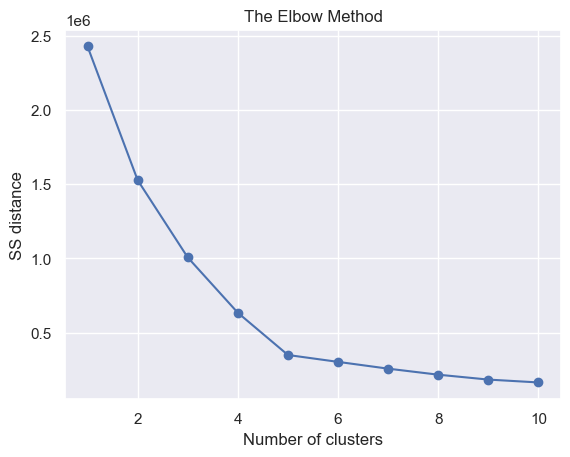

In [45]:
# Determine the number of clusters: Elbow method.

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

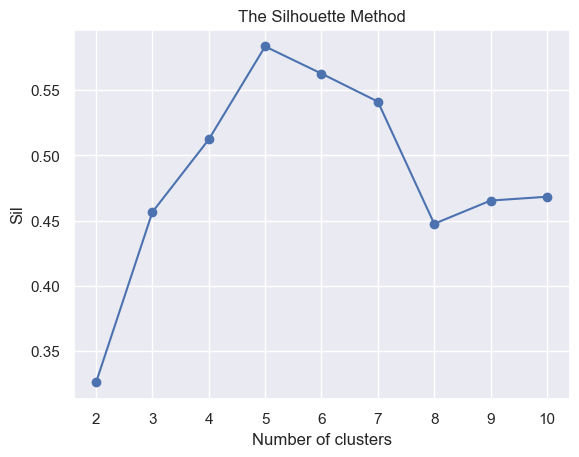

In [46]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Here, we can see the peak score is at where k = 5, so we use 5 clusters

## 4. Evaluate k-means model at different values of *k*

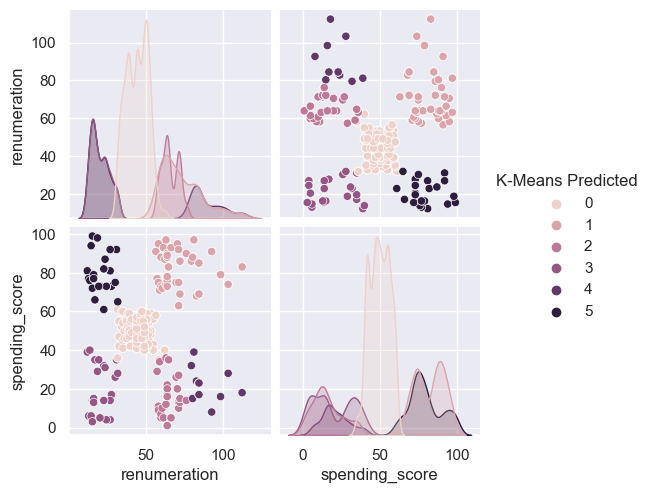

In [47]:
# Use six clusters first to see whether it would produce reasonable results.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

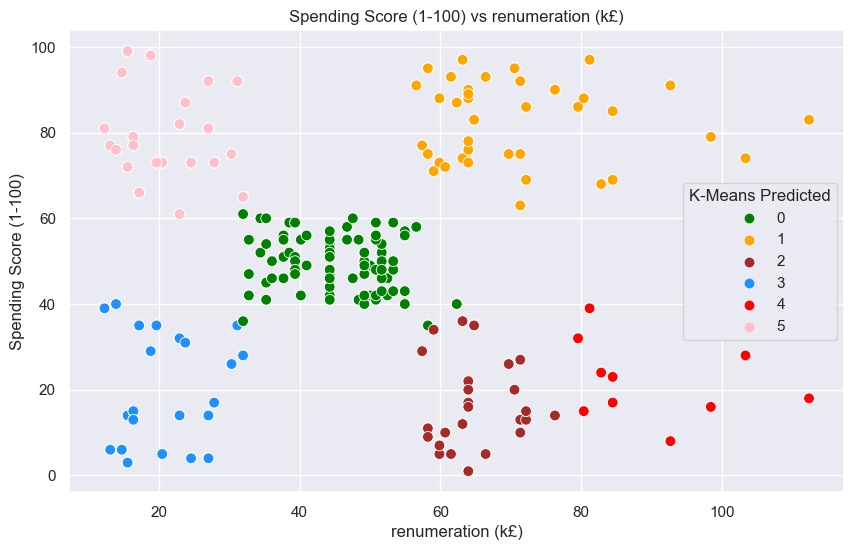

In [48]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'renumeration',y = 'spending_score',hue="K-Means Predicted",  
                 palette=['green','orange','brown','dodgerblue','red','pink'], legend='full',data = x  ,s = 60 )
plt.xlabel('renumeration (k£)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs renumeration (k£)')
plt.show()

Conclusion 6 clusters is not ideal, as it would cluster outliners

In [49]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [50]:
x['K-Means Predicted'].value_counts().sum()

2000

## 5. Fit final model and justify your choice

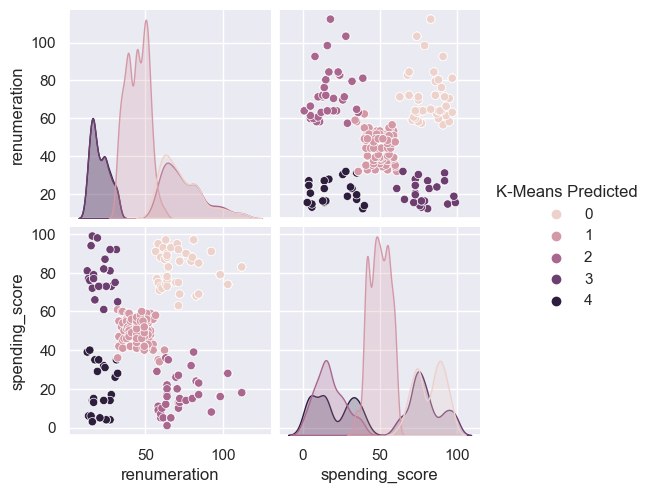

In [51]:
# Apply the final model.
# Use five clusters, given 6 cluster would simply cluster additional outliners
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [52]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

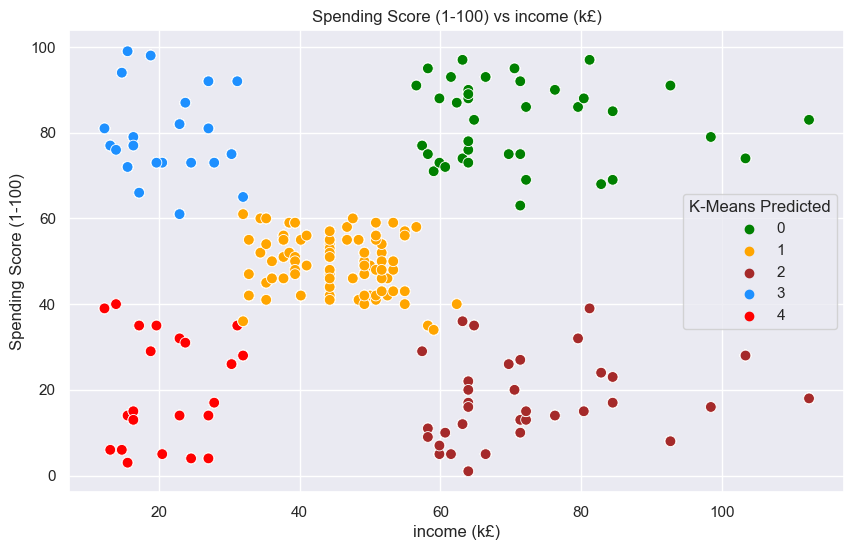

In [53]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'renumeration',y = 'spending_score',hue="K-Means Predicted",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = x  ,s = 60 )
plt.xlabel('income (k£)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs income (k£)')
plt.show()


In [54]:
#View the dataframe
x.head()

renumeration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4

In [55]:
x.describe()

renumeration  spending_score  K-Means Predicted
count   2000.000000     2000.000000        2000.000000
mean      48.079060       50.000000           1.662500
std       23.123984       26.094702           1.289351
min       12.300000        1.000000           0.000000
25%       30.340000       32.000000           1.000000
50%       47.150000       50.000000           1.000000
75%       63.960000       73.000000           3.000000
max      112.340000       99.000000           4.000000

## 7. Discuss: Insights and observations

***Your observations here...***

#### Comments:
- Based on the initial plots for exploration of the data one could already identify five clusters/segments from the beginning
- Elbow Method was used to find the number of clusters with the smallest sum of squares between the points, the smaller the better. In our analysis at 5 cluster we had very low SS distance, meaning the data points were close to each other from an internal cohesion perspective
- The Silhouette Method further helped to identify the number of cluster with the largest external distance to other clusters, meaning the higher the score better. In our analysis the highest score was at 5 clusters
- However we first initially tried the 6 cluster given the lower SS distance, but the visual graphs cleary demonstrated that 6 clusters simply lead to the additional clustering of outliner values
- Thus 5 cluster is the ideal number of cluster based on the Elbow and Silhouette Method and the initial distribution of the data points
- Overall the final 5 cluster scatter plot shows that label 3 blue and 4 red are low earners with at opposite spectrum of the spending score, meaning despite the similar income are spending either high or low
- Similiar are label 2 brown and 0 green, which are both high earners but either have low or high spending score. However these two groups have outliners with singifcant higher incomes and are expections
- In between we have label 1 orange, which are middle income earners with moderate spending score

# Analyze the Segments

**Segment 0: "Luxury Enthusiasts"**

Annual Income: 65k to 112k, Spending Score: 60-100

Possible Behaviors:

This segment comprises high-income customers with a strong spending inclination, making them high-value customers interested in luxury, personalization, and premium products. Marketing strategies emphasizing exclusivity, top quality, and unique offerings, along with tailored loyalty programs, are likely to engage them.

**Segment 1: "Balanced Shoppers"**

Annual Income: 35k to 65k, Spending Score: 40-60

Possible Behaviors:

This segment includes customers with moderate income and balanced spending habits, known for practical and well-considered shopping choices. Marketing messages emphasizing affordability, quality, and convenience are likely to resonate. Offering mid-range products with a good mix of features can capture their attention.

**Segment 2: "Savvy Savers"**

Annual Income: 65k to 112k, Spending Score: 60-100

Possible Behaviors:

This segment features higher-income customers with conservative spending tendencies, prioritizing savings and investments over luxury purchases. Effective marketing should emphasize value, quality, and long-term benefits, possibly including loyalty programs or savings discounts.

**Segment 3:  "Spending Optimists"**

Annual Income: 10k to 38k, Spending Score: 60-100

Possible Behaviors:

This segment consists of customers with lower incomes but high spending scores, potentially younger individuals or those prioritizing specific purchases despite budget constraints. Marketing should highlight affordability, discounts, and budget-friendly choices, possibly offering flexible payments, sales, and value bundles to engage this segment.

**Segment 4: "Budget Essentials"**

Annual Income: 10k to 38k, Spending Score: 0-40

Possible Behaviors:

This segment comprises customers with lower incomes and cautious spending habits, prioritizing essentials. Marketing should emphasize cost-saving options, necessities, and budget-friendly items, offering discounts and improving the in-store experience to boost spending.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [56]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from nltk.tokenize import sent_tokenize, word_tokenize

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to /Users/codyshan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/codyshan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3

gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [58]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [59]:
df3['review'].describe()

count        2000
unique       1980
top       love it
freq            5
Name: review, dtype: object

In [60]:
df3['summary'].describe()

count           2000
unique          1432
top       Five Stars
freq             378
Name: summary, dtype: object

In [61]:
# Keep necessary columns. Drop unnecessary columns.
df3_review_summary = df3.drop(columns=['gender', 'age', 'renumeration','spending_score','loyalty_points','education','product'])

# View DataFrame.
df3_review_summary


review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [62]:
# Determine if there are any missing values.
df3_review_summary['review'].isna().sum()

0

In [63]:
# Determine if there are any missing values.
df3_review_summary['summary'].isna().sum()

0

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [64]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
df3_review_summary['review'] = df3_review_summary['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_review_summary['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [65]:
# Summary: Change all to lower case and join with a space.
# Transform data to lowercase.
df3_review_summary['summary'] = df3_review_summary['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_review_summary['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [66]:
# Replace all the punctuations in review column.
# Remove punctuation.
df3_review_summary['review'] = df3_review_summary['review'].str.replace('[^\w\s]','')

# Preview the result.
df3_review_summary['review'].head()


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [67]:
# Replace all the puncuations in summary column.
# Remove punctuation.
df3_review_summary['summary'] = df3_review_summary['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3_review_summary['summary'].head()




0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [68]:
# Check the number of duplicate values in the review column.
df3_review_summary['review'].duplicated().sum()

50

In [69]:
# Check the number of duplicate values in the summary column.
df3_review_summary['summary'].duplicated().sum()

649

In [70]:
# Check for row numbers again
df3_review_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [71]:
# Drop duplicates in both columns.
df3_review_summary = df3_review_summary.drop_duplicates(subset=['review'])
df3_review_summary = df3_review_summary.drop_duplicates(subset=['summary'])

# View DataFrame.
print(df3_review_summary.info())
df3_review_summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1349 non-null   object
 1   summary  1349 non-null   object
dtypes: object(2)
memory usage: 31.6+ KB
None


review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1989  this is a fun card game for people who like wo...   
1990  fun for the family just make certain you agree...   
1992  great game to keep the mind active we play it ...   
1994  we are retired and find this a great way to st...   
1995  the perfect word game for mixed ages with mom ...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1989  this is a fun card game for people who like words  
1990  sort of a card game equivalent of scrabble and...  
1992                 great game to keep the mind active  
1994                                  a great mind game  
1995      the perfect word game for mixed ages with mom  

[1349 rows x 2 columns]

## 3. Tokenise and create wordclouds with stopwords

In [72]:
# Create new DataFrame (copy DataFrame).
df3_review_summary_copy = df3_review_summary.copy()

#Reset Index
df3_review_summary_copy.reset_index(drop=True, inplace=True)

# View DataFrame.
df3_review_summary_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1344  this is a fun card game for people who like wo...   
1345  fun for the family just make certain you agree...   
1346  great game to keep the mind active we play it ...   
1347  we are retired and find this a great way to st...   
1348  the perfect word game for mixed ages with mom ...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1344  this is a fun card game for people who like words  
1345  sort of a card game equivalent of scrabble and...  
1346                 great game to keep the mind active  
1347                                  a great mind game  
1348      the perfect word game for mixed ages with mom  

[1349 rows x 2 columns]

In [73]:
# Apply tokenisation to both columns.
df3_review_summary_copy['review_tokens'] = df3_review_summary_copy['review'].apply(word_tokenize)
df3_review_summary_copy['summary_tokens'] = df3_review_summary_copy['summary'].apply(word_tokenize)


# View DataFrame.
print(df3_review_summary_copy['review_tokens'].head())
df3_review_summary_copy['summary_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object


0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [74]:
# String all the reviews together in a single variable.
# Define an empty list of tokens.
all_review_tokens = []

for i in range(df3_review_summary_copy.shape[0]):
    # Add each token to the list.
    all_review_tokens.extend(df3_review_summary_copy['review_tokens'][i])

all_review_tokens

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [75]:
# Define an empty string variable.
review_token_string = ''

for value in all_review_tokens:
    # Add each filtered token word to the string.
    review_token_string = review_token_string + value + ' '

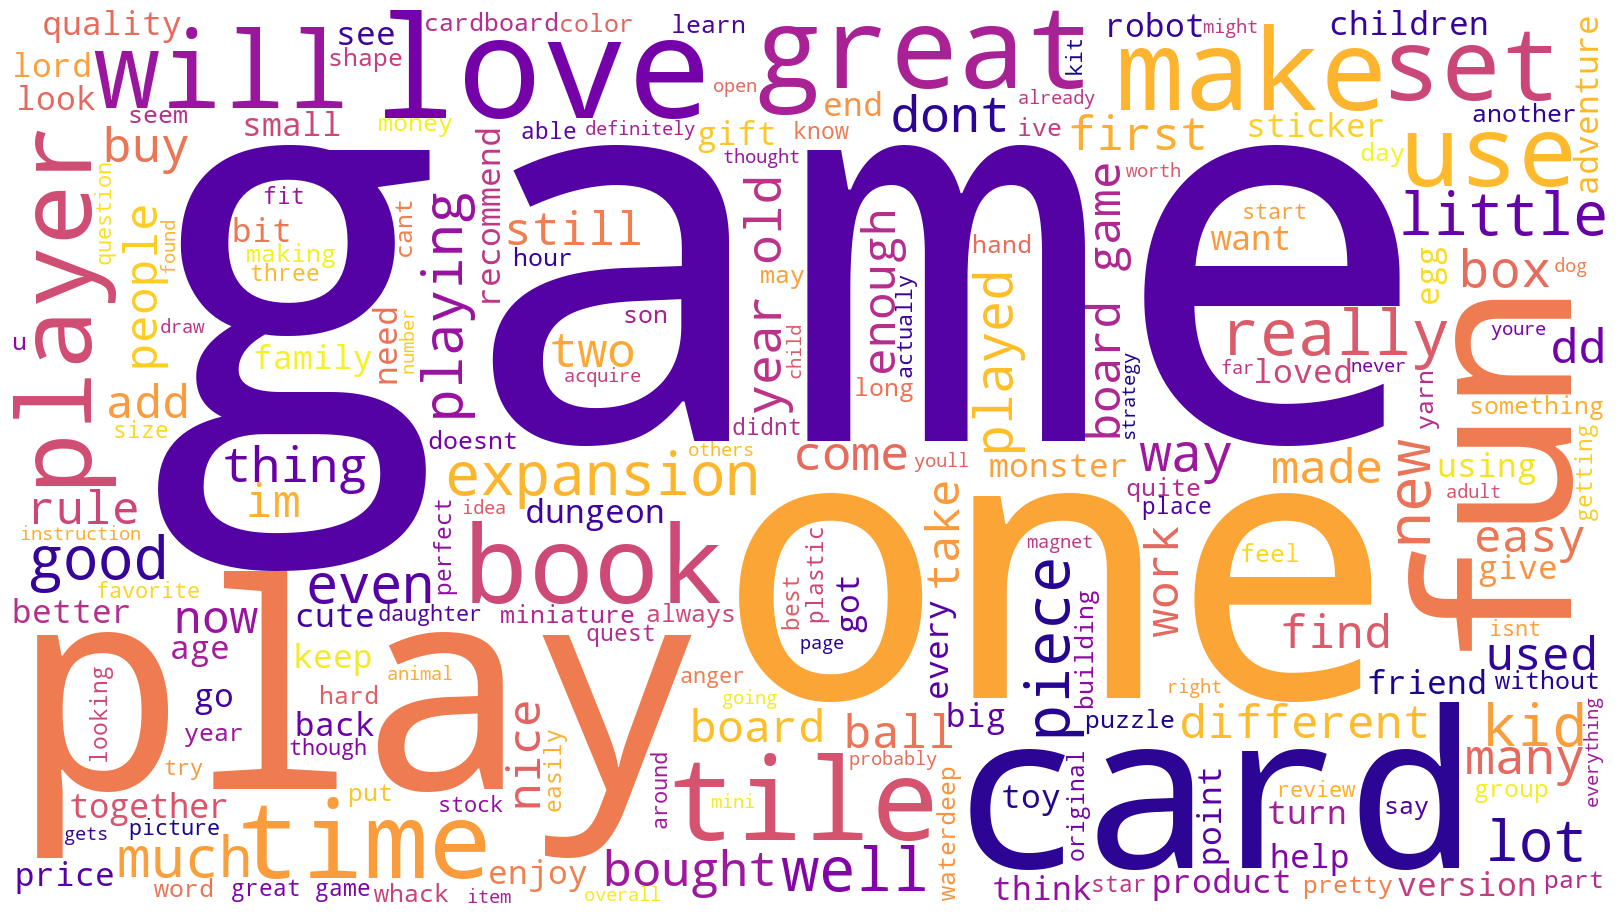

In [76]:
# Review: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_token_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



In [77]:
# Summary: Create a word cloud.
# String all the summaries together in a single variable.
# Define an empty list of tokens.
all_summary_tokens = []

for i in range(df3_review_summary_copy.shape[0]):
    # Add each token to the list.
    all_summary_tokens.extend(df3_review_summary_copy['summary_tokens'][i])

all_summary_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'not',
 'enough',
 'product',
 'good',
 'product',
 'but',
 

In [78]:
# Define an empty string variable.
summary_token_string = ''

for value in all_summary_tokens:
    # Add each filtered token word to the string.
    summary_token_string = summary_token_string + value + ' '

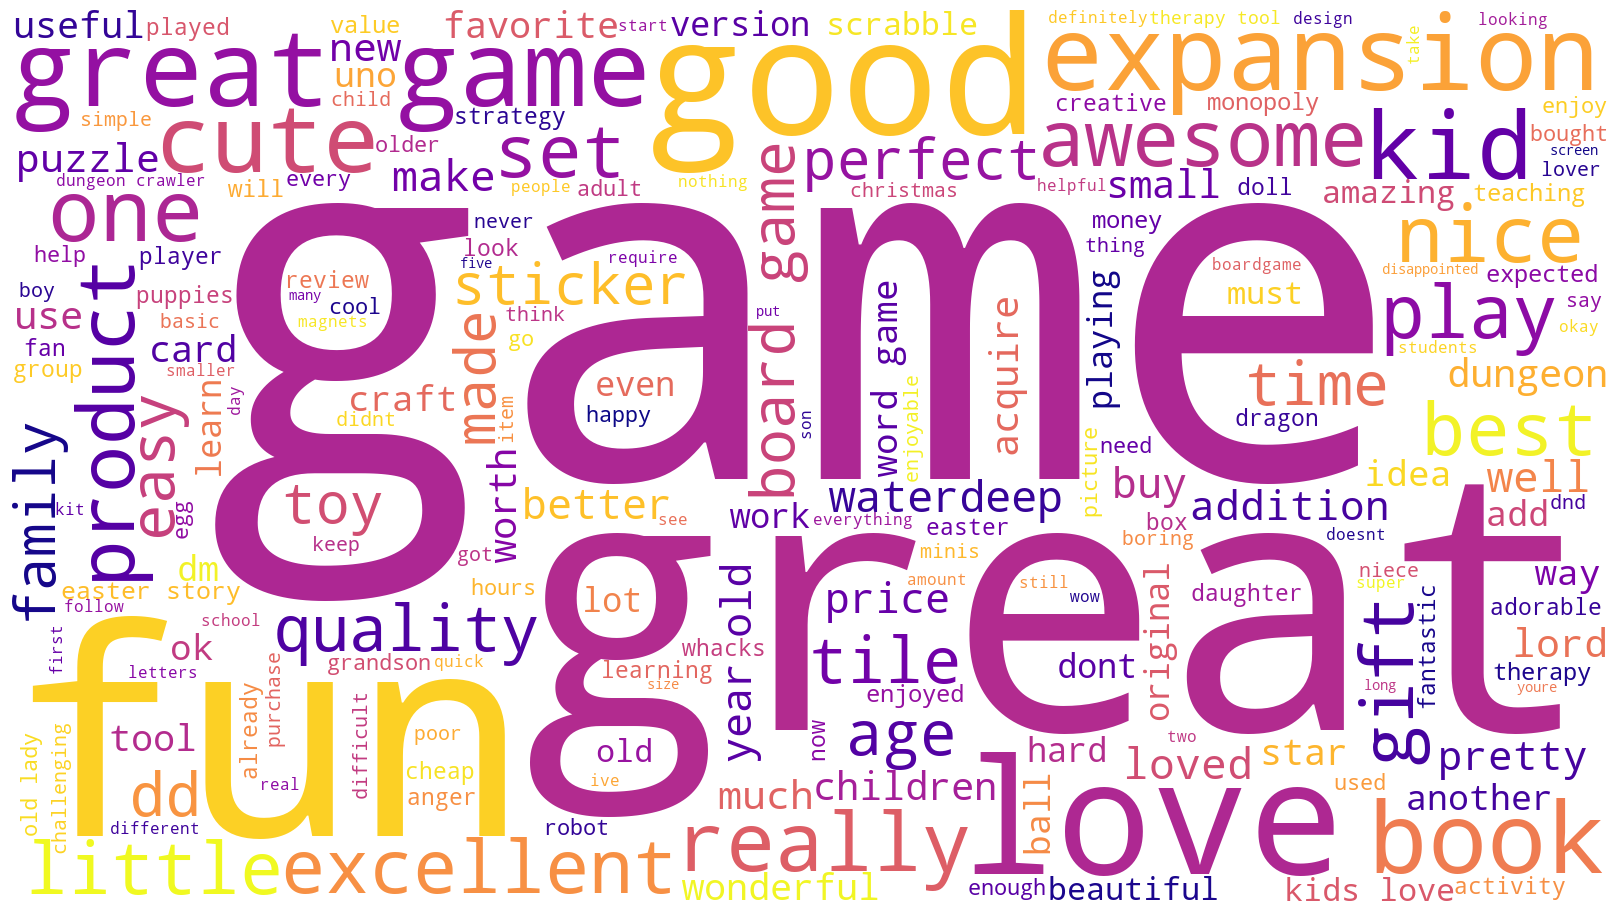

In [79]:
# Summary: Plot the WordCloud image.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_token_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [80]:
# Determine the frequency distribution.
fdist_review = FreqDist(all_review_tokens)

# Preview the data.
fdist_review

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [81]:
# Determine the frequency distribution.
fdist_summary = FreqDist(all_summary_tokens)

# Preview the data.
fdist_summary

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [82]:
# Delete all the alpanum.
all_review_tokens_clean = [word for word in all_review_tokens if word.isalnum()]
all_summary_tokens_clean = [word for word in all_summary_tokens if word.isalnum()]

In [83]:
# Remove all the stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
all_review_tokens_clean = [x for x in all_review_tokens_clean if x.lower() not in english_stopwords]
all_summary_tokens_clean = [x for x in all_summary_tokens_clean if x.lower() not in english_stopwords]



In [84]:
# Define an empty string variable.
review_token_string_clean = ''

for value in all_review_tokens_clean:
    # Add each filtered token word to the string.
    review_token_string_clean = review_token_string_clean + value + ' '

### 4c) Create wordcloud without stopwords

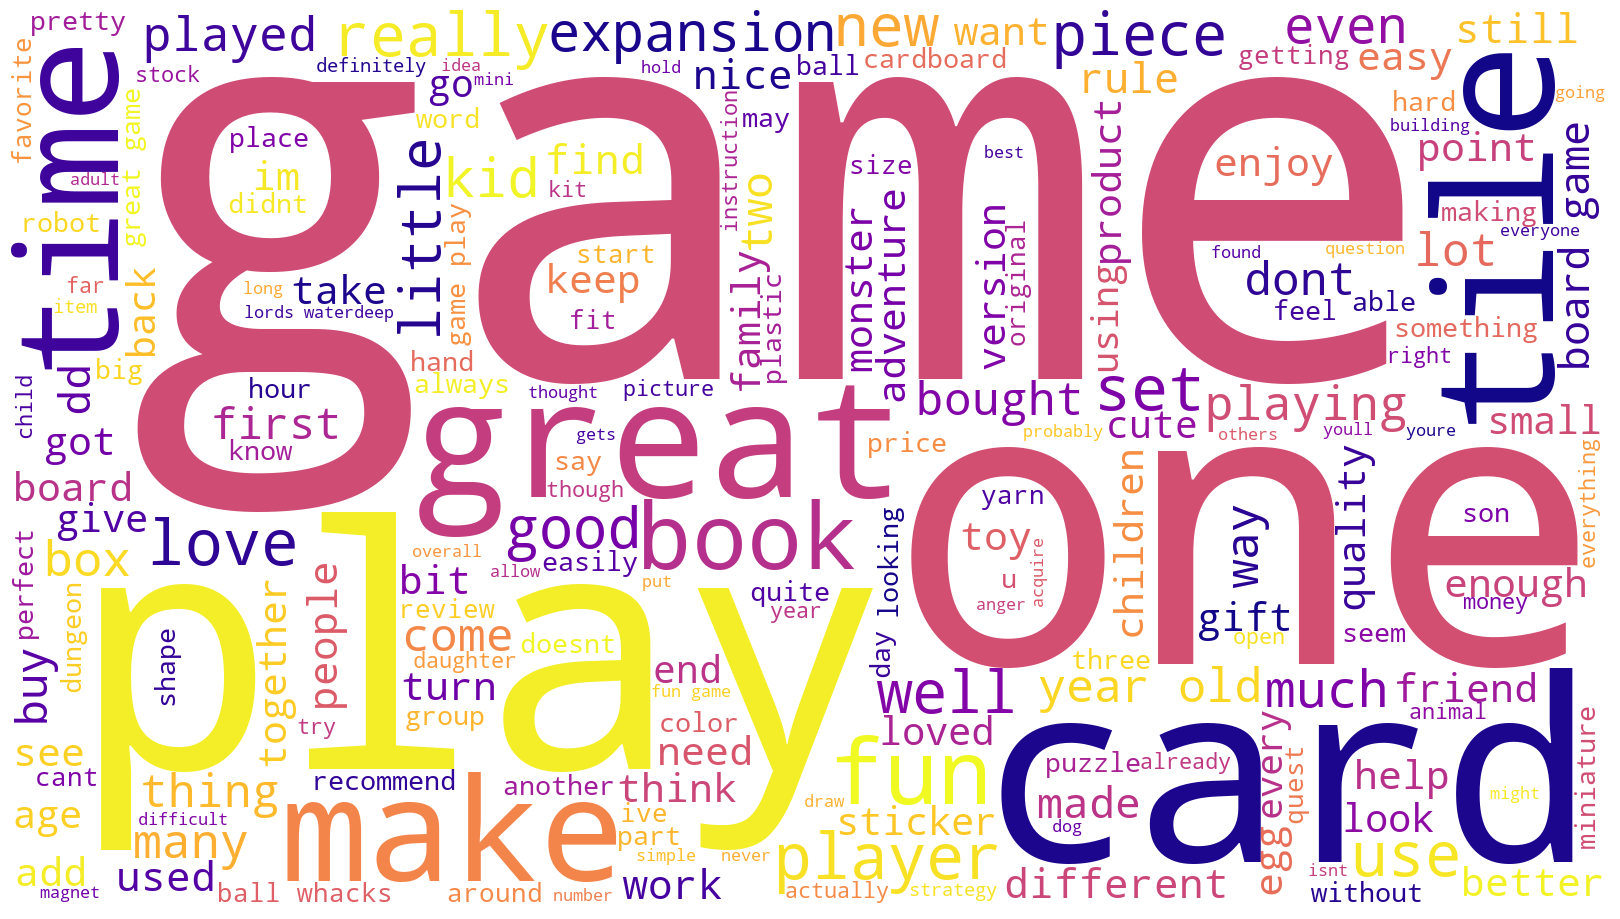

In [85]:
# Create a wordcloud without stop words.
# Review: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_token_string_clean) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



In [86]:
# Define an empty string variable.
summary_token_string_clean = ''

for value in all_summary_tokens_clean:
    # Add each filtered token word to the string.
    summary_token_string_clean = summary_token_string_clean + value + ' '

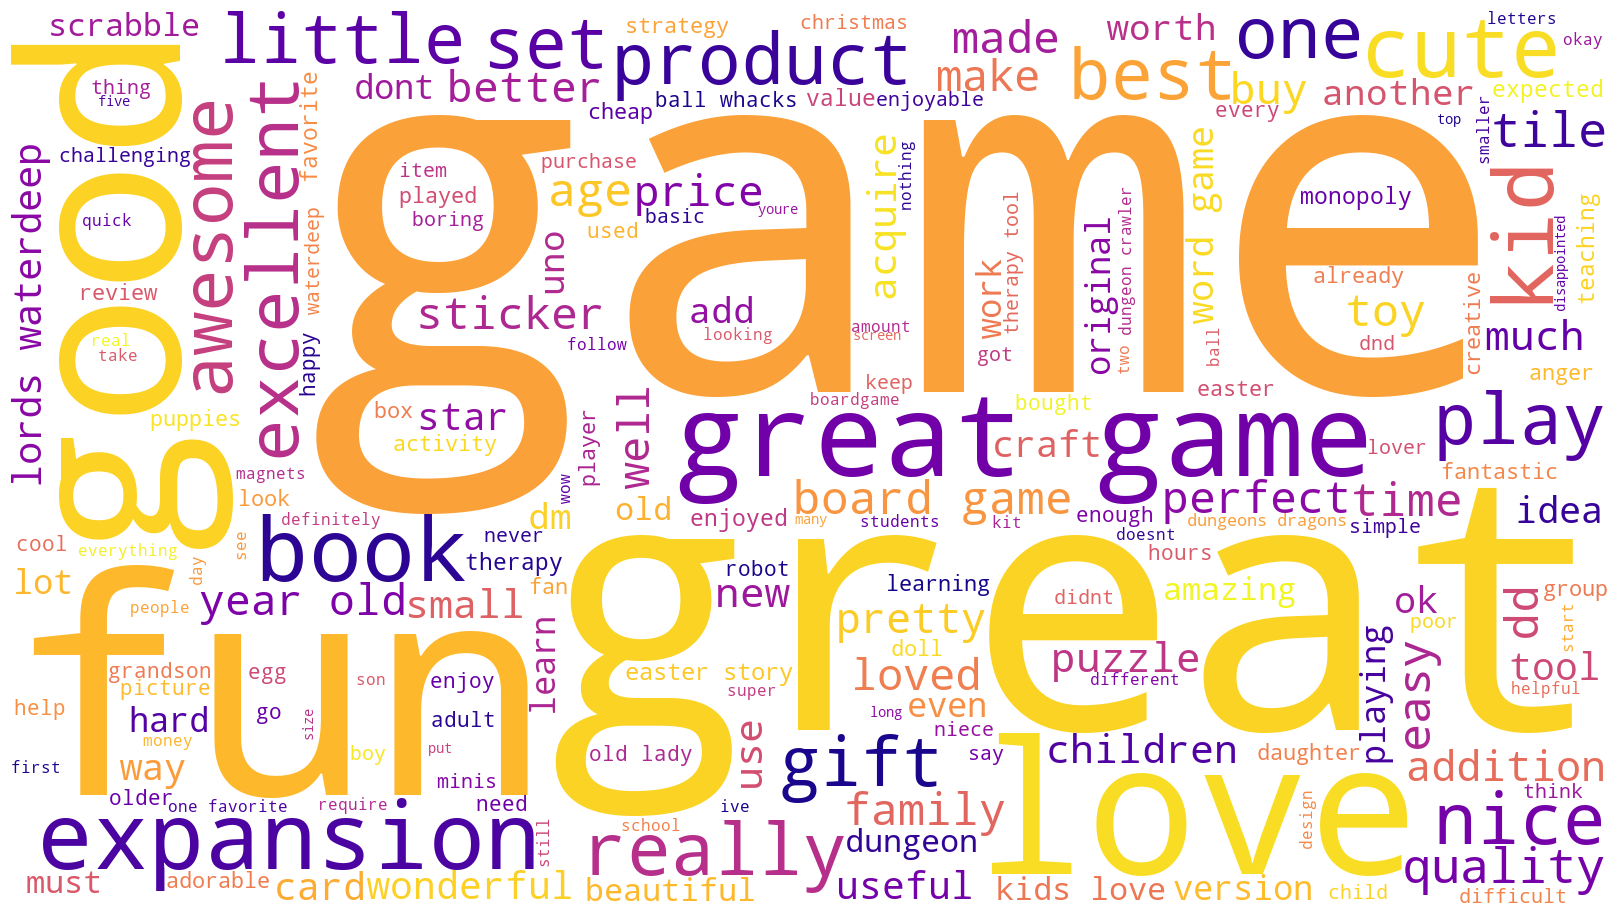

In [87]:
# Plot the wordcloud image.
# Summary: Plot the WordCloud image.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_token_string_clean) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



### 4d) Identify 15 most common words and polarity

In [88]:
# Determine the 15 most common words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
count_review = pd.DataFrame(Counter(all_review_tokens_clean).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
count_review

Frequency
Word             
game         1359
one           475
play          442
fun           407
great         391
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

In [89]:
# Determine the 15 most common words.

# Generate a DataFrame from Counter.
count_summary = pd.DataFrame(Counter(all_summary_tokens_clean).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
count_summary

Frequency
Word                
game             268
great            236
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

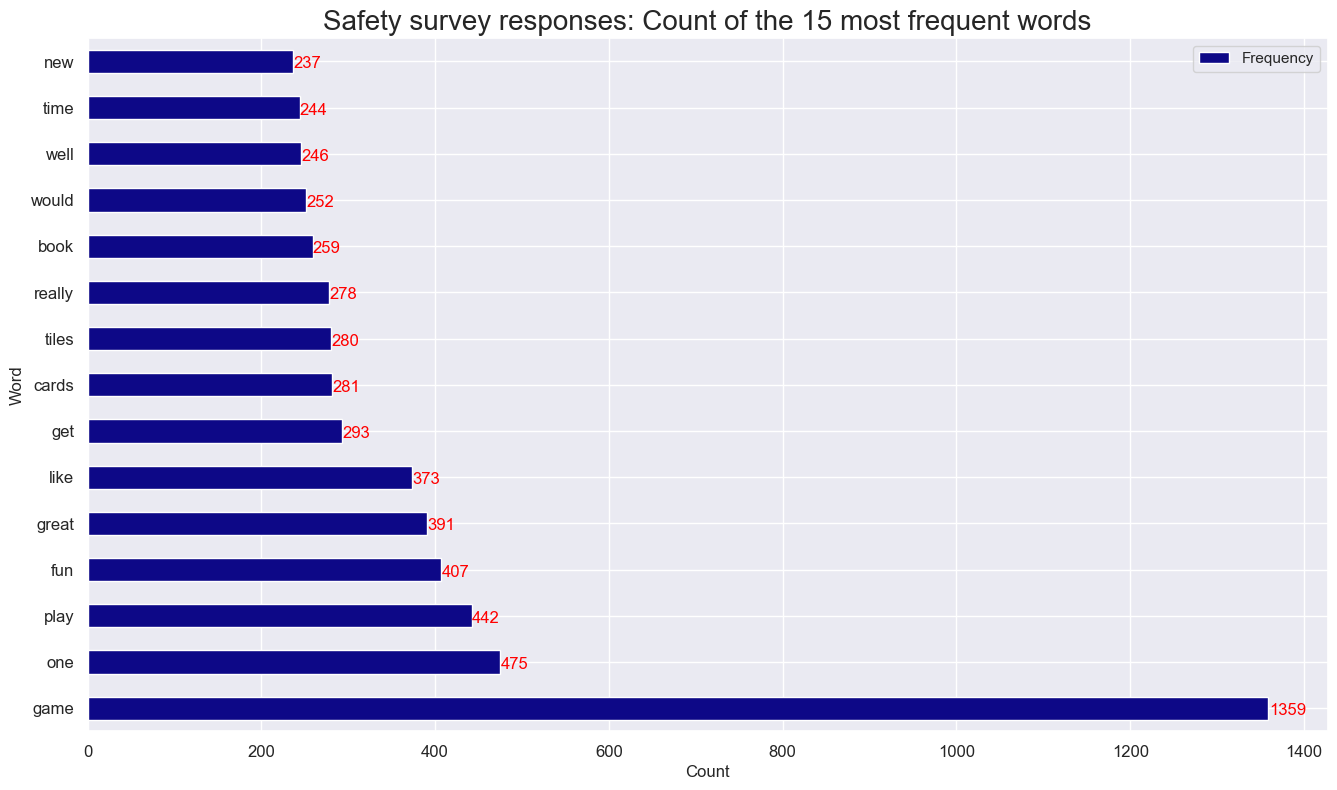

In [90]:
# Set the plot type.
ax = count_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

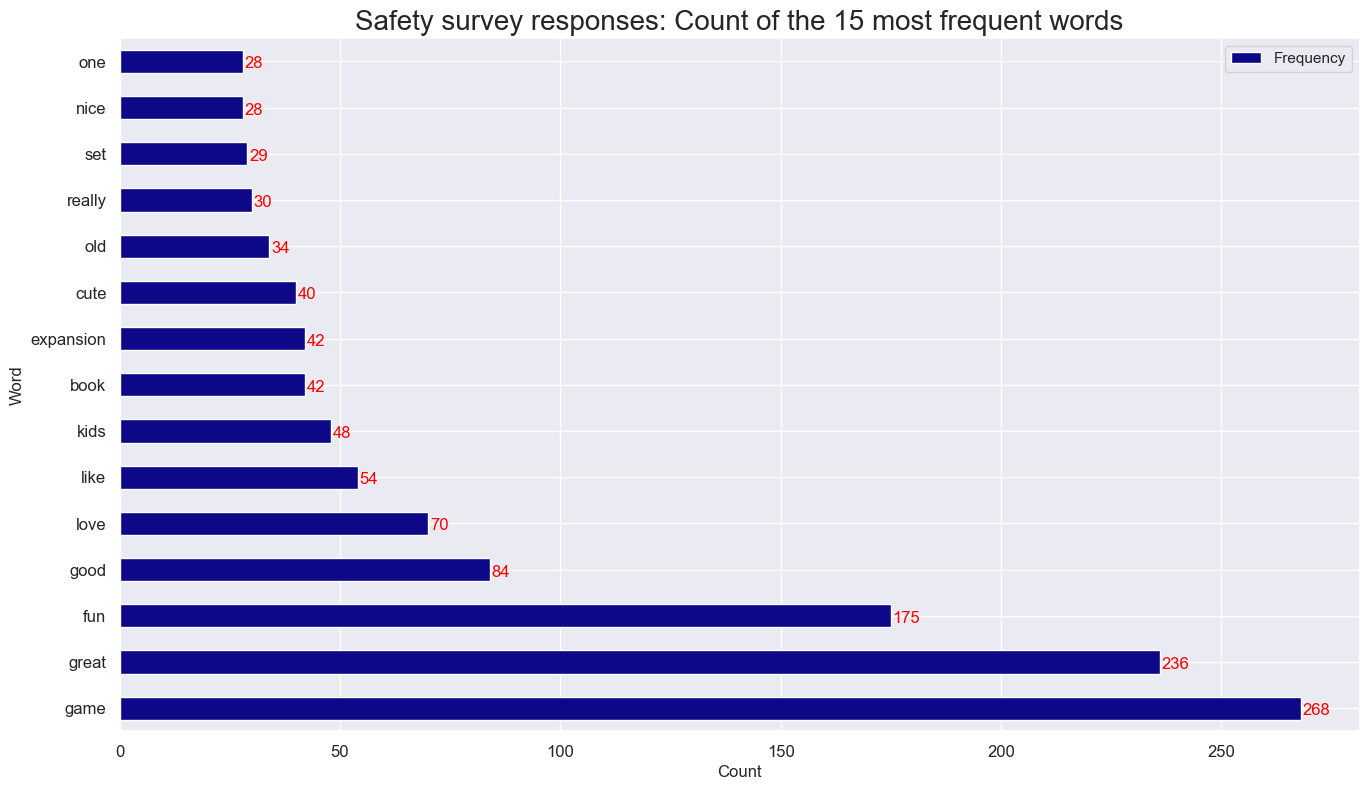

In [91]:
# Set the plot type.
ax = count_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### 4e) Sentiment and wordcloud without stopwordsand including stemming and lemmatized

In [92]:
# Import Library and download lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initializes an instance of the SentimentIntensityAnalyzer class from the NLTK's nltk.sentiment.vader module.
analyzer = SentimentIntensityAnalyzer() 


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/codyshan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [93]:
# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [94]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity_review = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3_review_summary_copy['review_tokens']}
df_polarity_summary = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3_review_summary_copy['summary_tokens']}

In [95]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity_review = pd.DataFrame(df_polarity_review).T
polarity_summary = pd.DataFrame(df_polarity_summary).T

# View the DataFrame.
polarity_review.head()

neg    neu    pos  \
when it comes to a dms screen the space on the ...  0.108  0.833  0.059   
an open letter to galeforce9 your unpainted min...  0.101  0.695  0.205   
nice art nice printing why two panels are fille...  0.136  0.711  0.153   
amazing buy bought it as a gift for our new dm ...  0.000  0.490  0.510   
as my review of gf9s previous screens these wer...  0.203  0.797  0.000   

                                                    compound  
when it comes to a dms screen the space on the ...   -0.6333  
an open letter to galeforce9 your unpainted min...    0.9404  
nice art nice printing why two panels are fille...   -0.0045  
amazing buy bought it as a gift for our new dm ...    0.8860  
as my review of gf9s previous screens these wer...   -0.6808

In [96]:
# View the DataFrame.
polarity_summary.head()

neg    neu    pos  \
the fact that 50 of this space is wasted on art...  0.145  0.723  0.132   
another worthless dungeon masters screen from g...  0.326  0.674  0.000   
pretty but also pretty useless                      0.306  0.165  0.529   
five stars                                          0.000  1.000  0.000   
money trap                                          0.697  0.303  0.000   

                                                    compound  
the fact that 50 of this space is wasted on art...   -0.0711  
another worthless dungeon masters screen from g...   -0.4404  
pretty but also pretty useless                        0.4019  
five stars                                            0.0000  
money trap                                           -0.3182

In [97]:
df3_review_summary_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1344  this is a fun card game for people who like wo...   
1345  fun for the family just make certain you agree...   
1346  great game to keep the mind active we play it ...   
1347  we are retired and find this a great way to st...   
1348  the perfect word game for mixed ages with mom ...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1344  this is a fun card game for people who like words   
1345  sort of a card game equivalent of scrabble and...   
1346                 great game to keep the mind active   
1347                                  a great mind game   
1348      the perfect word game for mixed ages with mom   

                                          review_tokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1344  [this, is, a, fun, card, game, for, people, wh...   
1345  [fun, for, the, family, just, make, certain, y...   
1346  [great, game, to, keep, the, mind, active, we,...   
1347  [we, are, retired, and, find, this, a, great, ...   
1348  [the, perfect, word, game, for, mixed, ages, w...   

                                         summary_tokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1344  [this, is, a, fun, card, game, for, people, wh...  
1345  [sort, of, a, card, game, equivalent, of, scra...  
1346         [great, game, to, keep, the, mind, active]  
1347                             [a, great, mind, game]  
1348  [the, perfect, word, game, for, mixed, ages, w...  

[1349 rows x 4 columns]

In [98]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Initialize lists for sentiment labels and word tokens
sentiment_labels_review = []
lemmatized_words_list_review = []

for i in range(0,len(df3_review_summary_copy)):
    text = df3_review_summary_copy["review"][i]
    
    # Tokenization - separate each review into separate entence
    sentences = sent_tokenize(text)
    
    # Separates each word
    words = [word.lower() for sentence in sentences for word in word_tokenize(sentence) if word.isalnum()]
    
    # Removing stopwords and punctuation
    words = [word for word in words if word not in english_stopwords]
    
    # Sentiment analysis
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_label = "positive" if sentiment_scores["compound"] > 0 else "negative" if sentiment_scores["compound"] < 0 else "neutral"
    sentiment_labels_review.append(sentiment_label) #creates a list of every sentiment label
    
    # Lemmatization and stemming
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words_list_review.extend(lemmatized_words)
    
    # Frequency distribution
    freq_dist = FreqDist(lemmatized_words)

In [99]:
df3_review_summary_copy['sentiment_labels_review'] = sentiment_labels_review

In [100]:
# Initialize lists for sentiment labels and word tokens
sentiment_labels_summary = []
lemmatized_words_list_summary = []

for i in range(0,len(df3_review_summary_copy)):
    text = df3_review_summary_copy["summary"][i]
    
    # Tokenization - separate each review into separate entence
    sentences = sent_tokenize(text)
    
    # Separates each word
    words = [word.lower() for sentence in sentences for word in word_tokenize(sentence) if word.isalnum()]
    
    # Removing stopwords and punctuation
    words = [word for word in words if word not in english_stopwords]
    
    # Sentiment analysis
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_label = "positive" if sentiment_scores["compound"] > 0 else "negative" if sentiment_scores["compound"] < 0 else "neutral"
    sentiment_labels_summary.append(sentiment_label) #creates a list of every sentiment label
    
    # Lemmatization and stemming
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words_list_summary.extend(lemmatized_words)
    
    # Frequency distribution
    freq_dist = FreqDist(lemmatized_words)

In [101]:
df3_review_summary_copy['sentiment_labels_summary'] = sentiment_labels_summary

In [102]:
df3_review_summary_copy.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens sentiment_labels_review  \
0  [the, fact, that, 50, of, this, space, is, was...                negative   
1  [another, worthless, dungeon, masters, screen,...                positive   
2               [pretty, but, also, pretty, useless]                negative   
3                                      [five, stars]                positive   
4                                      [money, trap]                negative   

  sentiment_labels_summary  
0                 negative  
1                 negative  
2                 positive  
3                  neutral  
4                 negative

In [103]:
df3_review_summary_copy['sentiment_labels_review'].value_counts()

positive    1208
negative     119
neutral       22
Name: sentiment_labels_review, dtype: int64

In [104]:
df3_review_summary_copy['sentiment_labels_summary'].value_counts()

positive    991
neutral     243
negative    115
Name: sentiment_labels_summary, dtype: int64

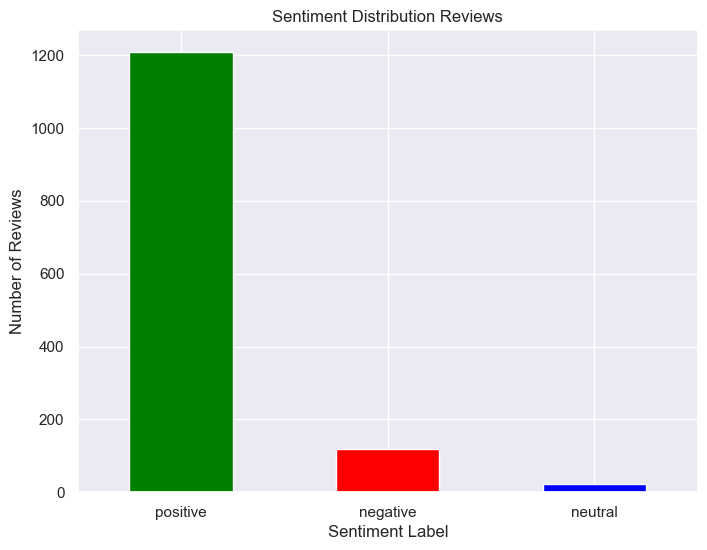

In [105]:
# Sentiment distribution visualization
plt.figure(figsize=(8, 6))
pd.Series(sentiment_labels_review).value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution Reviews")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

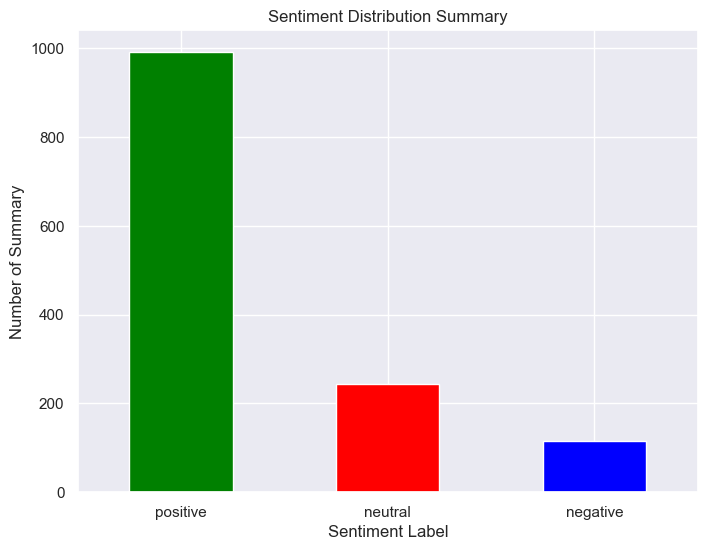

In [106]:
# Sentiment distribution visualization
plt.figure(figsize=(8, 6))
pd.Series(sentiment_labels_summary).value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution Summary")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Summary")
plt.xticks(rotation=0)
plt.show()

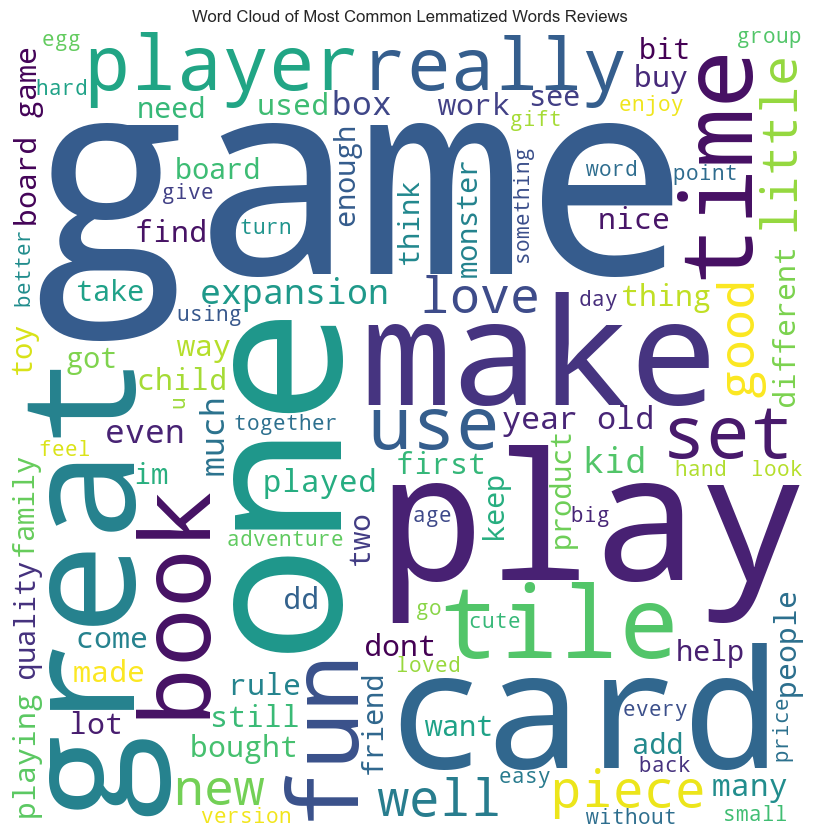

In [107]:
# Word cloud visualization
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(" ".join(lemmatized_words_list_review))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Most Common Lemmatized Words Reviews")
plt.show()

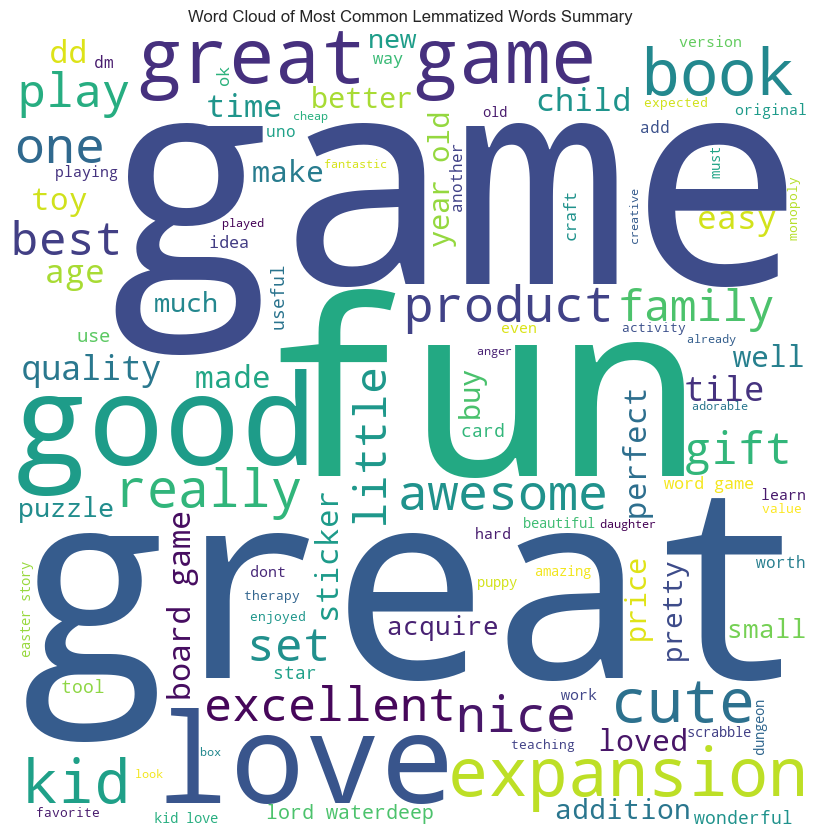

In [108]:
# Word cloud visualization
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(" ".join(lemmatized_words_list_summary))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Most Common Lemmatized Words Summary")
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [109]:
df3_review_summary_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1344  this is a fun card game for people who like wo...   
1345  fun for the family just make certain you agree...   
1346  great game to keep the mind active we play it ...   
1347  we are retired and find this a great way to st...   
1348  the perfect word game for mixed ages with mom ...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1344  this is a fun card game for people who like words   
1345  sort of a card game equivalent of scrabble and...   
1346                 great game to keep the mind active   
1347                                  a great mind game   
1348      the perfect word game for mixed ages with mom   

                                          review_tokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1344  [this, is, a, fun, card, game, for, people, wh...   
1345  [fun, for, the, family, just, make, certain, y...   
1346  [great, game, to, keep, the, mind, active, we,...   
1347  [we, are, retired, and, find, this, a, great, ...   
1348  [the, perfect, word, game, for, mixed, ages, w...   

                                         summary_tokens  \
0     [the, fact, that, 50, of, this, space, is, was...   
1     [another, worthless, dungeon, masters, screen,...   
2                  [pretty, but, also, pretty, useless]   
3                                         [five, stars]   
4                                         [money, trap]   
...                                                 ...   
1344  [this, is, a, fun, card, game, for, people, wh...   
1345  [sort, of, a, card, game, equivalent, of, scra...   
1346         [great, game, to, keep, the, mind, active]   
1347                             [a, great, mind, game]   
1348  [the, perfect, word, game, for, mixed, ages, w...   

     sentiment_labels_review sentiment_labels_summary  
0                   negative                 negative  
1                   positive                 negative  
2                   negative                 positive  
3                   positive                  neutral  
4                   negative                 negative  
...                      ...                      ...  
1344                positive                 positive  
1345                positive                 positive  
1346                positive                 positive  
1347                positive                 positive  
1348                positive                 positive  

[1349 rows x 6 columns]

In [110]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df3_review_summary_copy['review_polarity'] = df3_review_summary_copy['review'].apply(generate_polarity)
df3_review_summary_copy['summary_polarity'] = df3_review_summary_copy['summary'].apply(generate_polarity)

# Preview the result.
print(df3_review_summary_copy['review_polarity'].head())
df3_review_summary_copy['summary_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

In [111]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df3_review_summary_copy['review_subjectivity'] = df3_review_summary_copy['review'].apply(generate_subjectivity)
df3_review_summary_copy['summary_subjectivity'] = df3_review_summary_copy['summary'].apply(generate_subjectivity)

# Preview the result.
print(df3_review_summary_copy['review_subjectivity'].head())
df3_review_summary_copy['summary_subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review_subjectivity, dtype: float64


0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity, dtype: float64

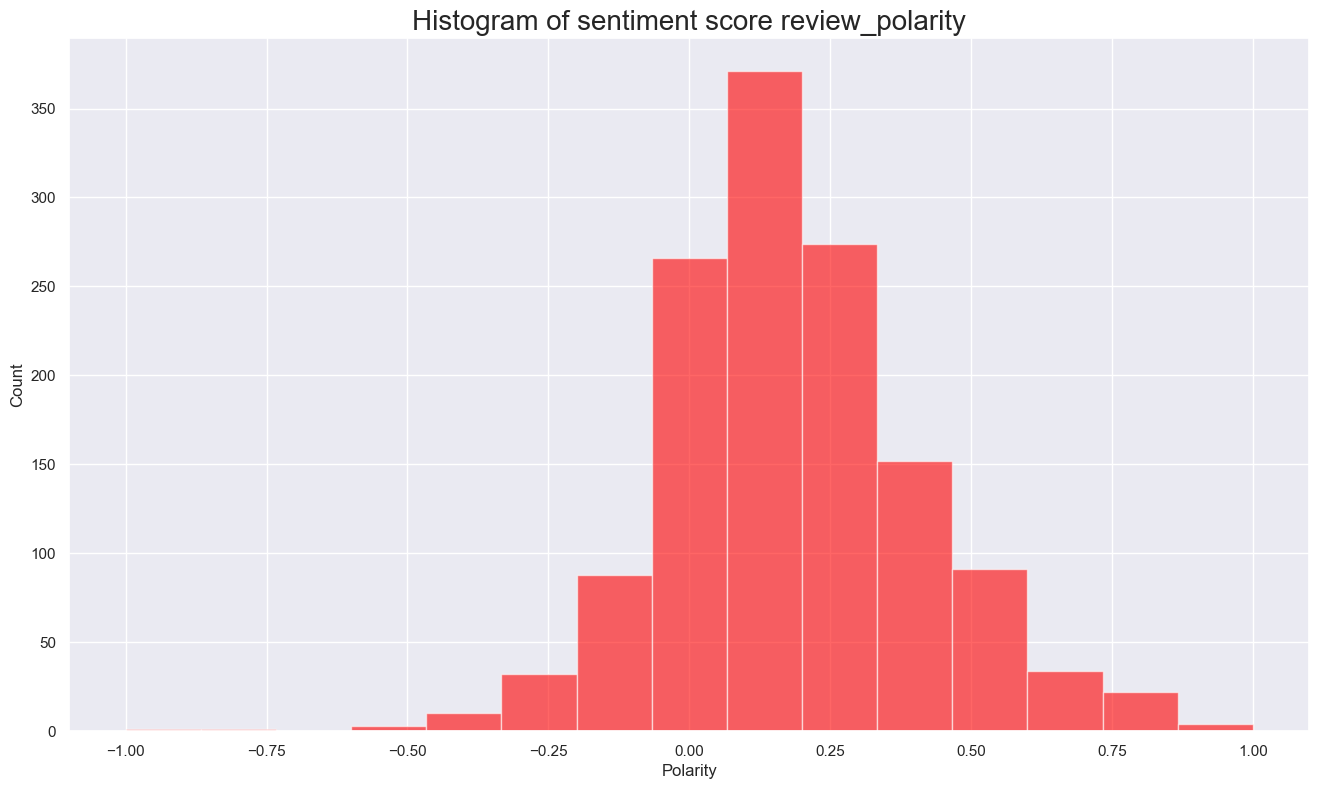

In [112]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_review_summary_copy['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score review_polarity', fontsize=20)

plt.show()


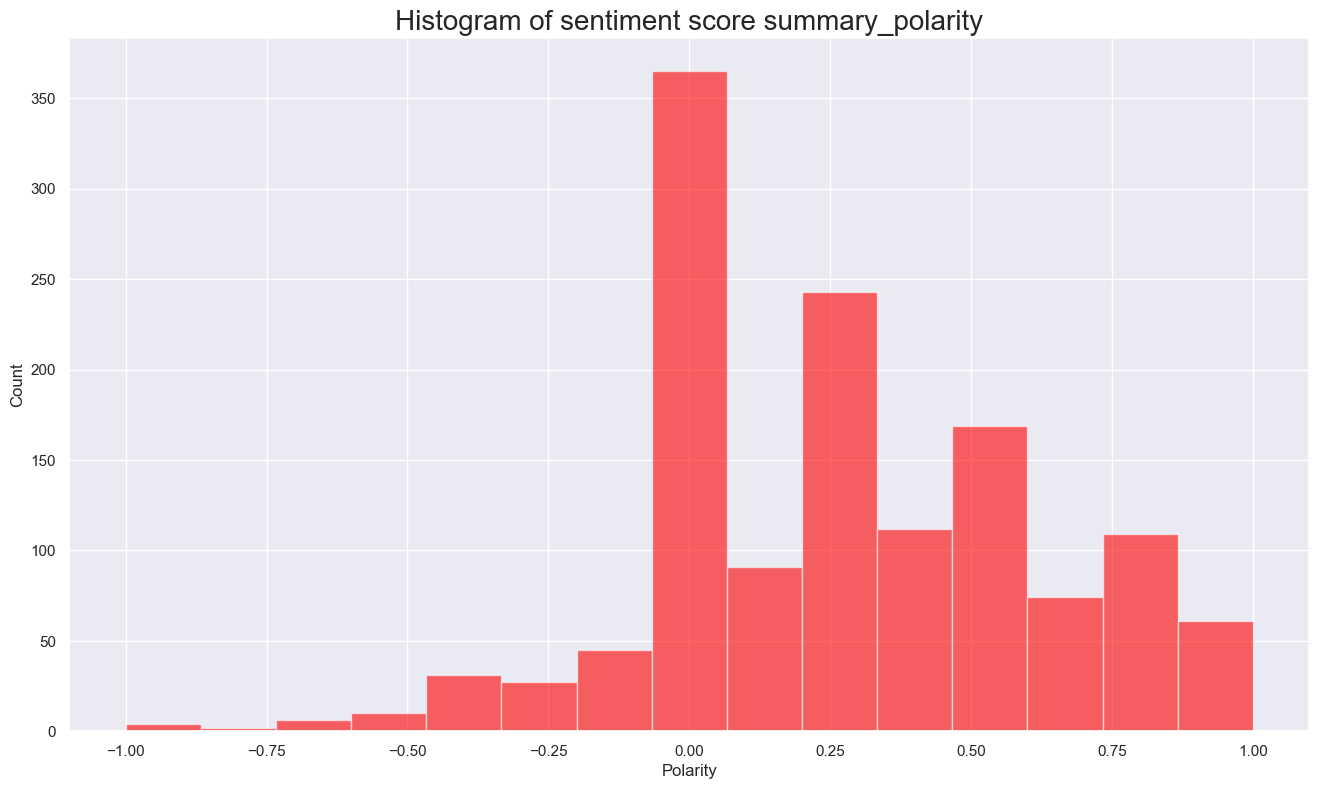

In [113]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_review_summary_copy['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score summary_polarity', fontsize=20)

plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [114]:
df3_review_summary_copy.columns

Index(['review', 'summary', 'review_tokens', 'summary_tokens',
       'sentiment_labels_review', 'sentiment_labels_summary',
       'review_polarity', 'summary_polarity', 'review_subjectivity',
       'summary_subjectivity'],
      dtype='object')

In [115]:
# Top 20 positive reviews.

# Create a DataFrame.
positive_sentiment_review = df3_review_summary_copy.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['review', 'review_polarity', 'review_subjectivity','sentiment_labels_review']]

# Adjust the column width.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})


In [116]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment_summary = df3_review_summary_copy.nlargest(20, 'summary_polarity')

#Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['summary', 'summary_polarity', 'summary_subjectivity','sentiment_labels_summary']]

# Adjust the column width.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})




In [117]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment_review = df3_review_summary_copy.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['review', 'review_polarity', 'review_subjectivity','sentiment_labels_review']]

# Adjust the column width.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [118]:
# Top 20 negative summaries.

# Create a DataFrame.
negative_sentiment_summary = df3_review_summary_copy.nsmallest(20, 'summary_polarity')

#Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'summary_polarity', 'summary_subjectivity','sentiment_labels_summary']]

# Adjust the column width.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})



## Extra: Identified named entities and highlighting of entities

In [119]:
# Install spaCy.
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.4 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [120]:
# Install the spaCy library if you did not complete this task previously.
!pip install spaCy

# Import the library.
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
 return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [121]:
df3_review_summary_copy['named_entities_review'] = df3_review_summary_copy['review'].apply(generate_named_entities)

df3_review_summary_copy.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens sentiment_labels_review  \
0  [the, fact, that, 50, of, this, space, is, was...                negative   
1  [another, worthless, dungeon, masters, screen,...                positive   
2               [pretty, but, also, pretty, useless]                negative   
3                                      [five, stars]                positive   
4                                      [money, trap]                negative   

  sentiment_labels_summary  review_polarity  summary_polarity  \
0                 negative        -0.036111              0.15   
1                 negative         0.035952             -0.80   
2                 positive         0.116640              0.00   
3                  neutral         0.578788              0.00   
4                 negative        -0.316667              0.00   

   review_subjectivity  summary_subjectivity  \
0             0.486111              0.500000   
1             0.442976              0.900000   
2             0.430435              0.733333   
3             0.784848              0.000000   
4             0.316667              0.000000   

                               named_entities_review  
0     [(50, CARDINAL), (2, CARDINAL), (1, CARDINAL)]  
1                                [(galeforce9, ORG)]  
2  [(two, CARDINAL), (one, CARDINAL), (npcs, ORG)...  
3                                                 []  
4                                      [(gf9s, ORG)]

In [122]:
from spacy import displacy

# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if df3_review_summary_copy['named_entities_review'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(df3_review_summary_copy['review'][i]), style='ent', jupyter=True)

KeyError: 1349

Generate a document-term matrix

In [ ]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(df3_review_summary_copy['review'])

In [ ]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:1349]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 1350)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words. 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

In [ ]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

## 7. Discuss: Insights and observations

***Your observations here...***

#### Comments:
- For processing customer reviews, we need libraries like NLTK, OS, WordCloud, Collections, TextBlob, and SciPy. The process involves data cleaning, including converting text to lowercase, removing punctuation, and eliminating duplicates. To extract meaningful insights from the text, we tokenize sentences and words, eliminate stopwords, and further stem and lemmatize words while assigning sentiment scores. The final output can be shown in a word cloud, plots and analysed with SentimentIntensityAnalyzer to derive their polarity and sentiment score.
- It is crucial to clean the data otherwise word cloud and other visualization might show a skwed image
- Game is the most frequent words across reviews and summaries
- Great and fun are also very frequent words across reviews and summaries and contribute towrads the strong postiive sentiment as shown in the histograms
- Mostly positive sentiment, followed by a signficant lower neutral count and negative count
- Based on the top 20 postivie and negative reviews and summaries, a majority of sentiment was categorized accurately given the ambiguity, syntax, grammar, language and sentiment, illustrating the important of word processing
- Based on the top 20 postivie and negative reviews and summaries, a majority of sentiment was categorized accurately given the ambiguity, syntax, grammar, language and sentiment, illustrating the important of word processing
- The recommendation is to maintain the current strategy due to the overwhelmingly positive sentiment. However, we should place greater emphasis on key word counts and attributes. Additionally, we should assess both positive and negative sentiment comments for valuable feedback to shape future campaigns.
- Additional analysis connecting the sentiment to the customer and product to inform better targeting in the future

# 